# NetFlix Data 분석하기
- 요즘 내가 가장 애용하는 OTT 서비스 넷플릭스의 2019년까지 제작된 영화, TV Show 관련 데이터이다.
- 데이터의 정보가 많지는 않지만 워낙 관심이 많은 기업이고 실제로 사용 중인 서비스이기때문에 재미있고 유의미한 결과를 얻을 수 있을 것 같다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.__version__

'0.11.1'

## 예측
1. 해가 지남에따라 제작된 제품의 수는 점점 증가할 것이고 그 증가 폭도 늘어날 것으로 예상한다.넷플릭스가 굉장히 빠르게 성장하고 있는 기업이기 때문이다.
 - 2020년에 코로나가 발생해 작품 수에 어떤 영향을 주었는지 알고싶지만 아쉽게도 이 데이터는 19년에 수집한 것이라고한다.
2. 국가별 제작편수는 넷플릭스가 미국 기업이기에 미국이 단연 1등 그 외에는 유렵에 있는 국가들 또는 한중일이 뒤를 이을 것 같다. 
 - 특히 우리나라의 제작편수가 궁금하다.
3. cast 변수를 통해 넷플릭스 작품중에서 가장 다작을한 배우가 누구인지 확인해 볼 수 있을 것 같다.

In [3]:
data = pd.read_csv('./netflix_titles.csv')
print(data.shape)
data.head()

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
## 숫자 데이터 특성확인 , 해당 데이터는 의미없는듯...
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [5]:
## 데이터 원소 타입 확인
data.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
## 결측치 확인
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
data.corr()

,show_id,release_year
show_id,1.000000,0.566577
release_year,0.566577,1.000000


# Feature 1. 연도별 제작된 작품 증가 추이 분석 (release_year)  
- 데이터를보면 type 변수에서 영화와 TV쇼로 나누어져 있는데 매년 증가추이를 이 둘로 나누어 구분해보면 Netflix가 어느 산업에 더 무게를 두고있는지 알 수 있을 것 같다.

In [8]:
data_release = data.groupby('release_year').count().sort_values(by = 'show_id'  ,ascending = False).head(20)
data_release.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
2018,1063,1063,1063,645,940,954,1062,1063,1063,1063,1063
2017,959,959,959,685,842,900,959,957,959,959,959
2019,843,843,843,403,745,727,843,843,843,843,843
2016,830,830,830,587,733,766,828,829,830,830,830
2015,517,517,517,364,473,479,515,512,517,517,517


## 시간에따른 제작 작품 수
- 해마다 출시되는 편수가 점점 증가하고있음을 알수있다. 특히 2015년과 2016년에 극적으로 증가했다. 이때 아무래도 넷플렉스의 고객도 가장 늘어나고 사업적으로도 큰 변화와 확대가 있었을 것이다.
- 다만, 2019년에는 어떤이유인지 2018년보다 조금 감소했는데 그동안 사업을 무리하게 확장한 것인지 아니면 기업에서 어떤 이슈가 있었기 때문인지 확인이 필요할 것 같다. 
- 2020년에 출시편수가 거의 없는 것으로보아 해당연도 초쯤에 수집한 데이터인 듯하다.

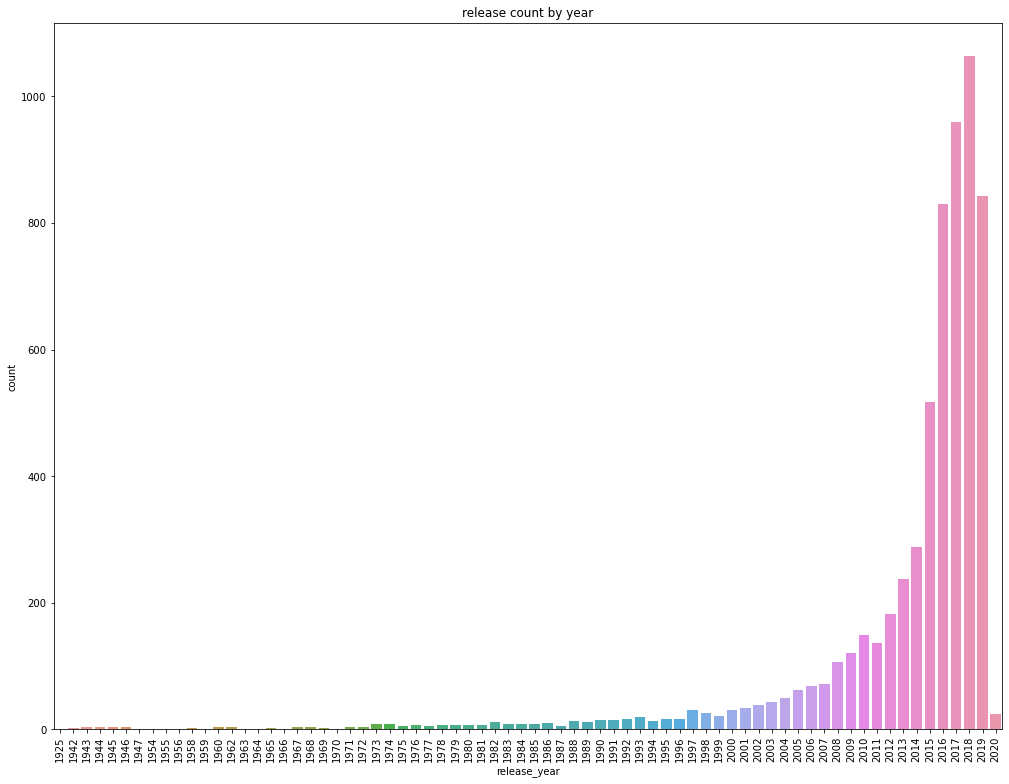

In [9]:
plt.figure(figsize = (17,13))
plt.title('release count by year')
plt.xticks(rotation= 90)
sns.countplot(data= data, x = 'release_year')
plt.show()

##  Movie VS TV Show 
- 둘다 점점 해가갈수록 작품수가 증가하는 추세이고 갈수록 상대적으로 TV쇼가 차지하는 비중이 점점 커지고있다. 2019년에는 결국 영화를 앞질렀다. 
- 이 결과를 통해 넷플릭스가 시간이갈수록 영화보다 TV Show 제작에 사업의 무게를 두고있다고 볼 수 있지만 특이한 점은 2019년에 출시된 작품수가 영화는 크게 감소했고 TV Show는 그 증가율이 매우작아 당해년도에 무슨일이 있었던 것인지, 아니면 사업이 포화되어 이제 작품수 증가가 앞으로 거의 없는 것인지 현재 데이터로는 알 수 없다.

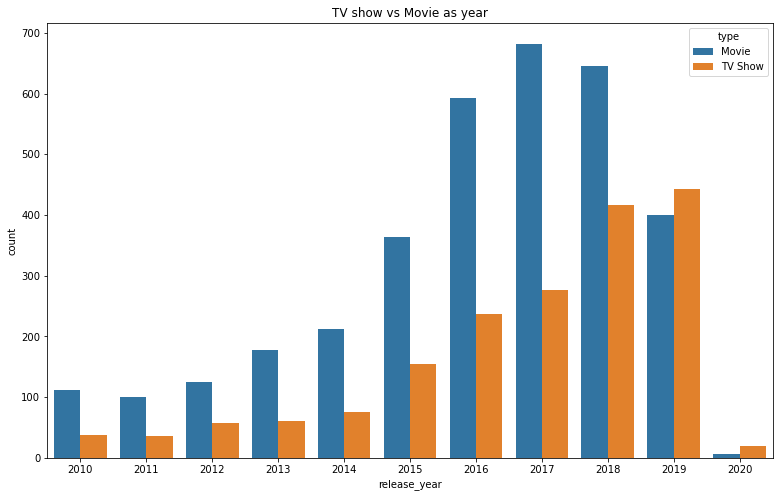

In [10]:
data_release200 = data[data['release_year'] >=2010]
# data_release200
plt.figure(figsize = (13,8))
sns.countplot(data =data_release200, x='release_year', hue = 'type')
plt.title('TV show vs Movie as year')
plt.show()

# Feature 2. 국가별 제작 편수 (country)
- 데이터가 수집된 당시기준(2020년 초 예상) 총 몇개국에서 Netflix가 제작되고 또 연도별로 그 추세는 어떠한지 알아보겠다. 
- 아무래도 Netflix가 미국 기업이고 미국의 시장이 가장 크다보니 제작편수가 가장 많을 것이라고 예상하며 그 외 다른 국가들의 순위는 유럽이나 한중일 정도로 추측되는데 실제로 그런지 확인해보겠다.

In [11]:
data[data['country'] == 'South Korea']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
71,80187061,Movie,The Mayor,Park In-je,"Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-...",South Korea,"September 30, 2017",2017,TV-MA,130 min,"Dramas, International Movies","With the presidency in mind, the incumbent may..."
146,81095101,TV Show,Vagabond,NaN,"Lee Seung-gi, Bae Suzy, Shin Sung-rok, Moon Ju...",South Korea,"September 21, 2019",2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Ac...","When his nephew dies in a plane crash, stunt m..."
190,81144925,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,"September 18, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...
285,81011508,TV Show,Life,NaN,"Lee Dong-wook, Cho Seung-woo, Won Jin-ah, Lee ...",South Korea,"September 12, 2018",2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","At Korea's top university medical center, idea..."
443,81161487,TV Show,My Country: The New Age,NaN,"Yang Se-Jong, Woo Do‑hwan, Seolhyun, Jang Hyuk...",South Korea,"October 5, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Ac...","At the end of the Goryeo period, there were th..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6135,80176931,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim​, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Reali...",The best chefs of Korea go head-to-head to cre...
6181,80175275,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,"August 1, 2017",2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...
6202,80116626,TV Show,The Cravings,NaN,"Park Hee-bon, Phillip Choi, Hong Wan-pyo, Choi...",South Korea,"April 20, 2017",2016,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, TV Co...",Thirtysomething career woman Jae-yeong attempt...


In [16]:
## 결측치 제거
country_release = data[data['country'].notnull()]
country_release.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 전세계 총 172개국에 제작된 것을 확인할 수 있다.

In [21]:
nation = set()
nation_list =[]

for i in country_release['country']:
    nation.update(i.split(','))
    
for i in list(nation)[1:]:
    nation_list.append(i.strip())
nation_list.sort()
len(nation_list)
# nation_list

172

## 국가별 제작 편수 TOP 10
- 예상과 다르게 2위에 인도가 있다. 인도의 발리우드 산업에대해서는 알고있었지만 이렇게 클 것이라고는 예상하지 못했고 아무래도 국내 넷플리스에는 인도 작품이 잘 보이지않아 더 의외였던 것 같다.
- 또한 10위안에 중국이 없었고 대신 10위에 멕시코가 자리했다. 멕시코 영화나 TV Show는 알고있는게 하나도 없다...
- 가장 중요하 우리나라는 8위. 생각보다 작품수가 적었다. 하지만 지금 결과는 2020년 까지의 누적 데이터이기 때문에 넷플릭스가 우리나라에 늦게 진출했다면 누적 제작편수가 작을 수 밖에 없다고 생각한다. 따라서 가장 최근이라고 할 수 있는 18년 ~ 19년 국가별 제작편수만을 따로 확인해 보겠다.

In [30]:
country_list = []
country_dict ={}
for i in country_release['country']:
    country_list += i.split(',')

# country_list
for j in country_list:
    country_dict[j.strip()] = country_dict.get(j.strip(),0 ) + 1

# country_dict
top_10=sorted(country_dict.items(), key = lambda x: x[1], reverse=True)[:10]
for i in range(len(top_10)):
    print(f'{i+1}위', top_10[i])

## 제작 편수가 가장 많은 순 Top 10을 뽑아보았다.
## 단연 미국이 1등이고 우리나라도 8번째에 자리하고있다. 의외로 인도가 2등인데 인도의 영화, Tv 산업이 크고 활발하다는 것을 짐작할 수 있다. 

1위 ('United States', 2610)
2위 ('India', 838)
3위 ('United Kingdom', 602)
4위 ('Canada', 318)
5위 ('France', 271)
6위 ('Japan', 231)
7위 ('Spain', 178)
8위 ('South Korea', 162)
9위 ('Germany', 151)
10위 ('Mexico', 129)


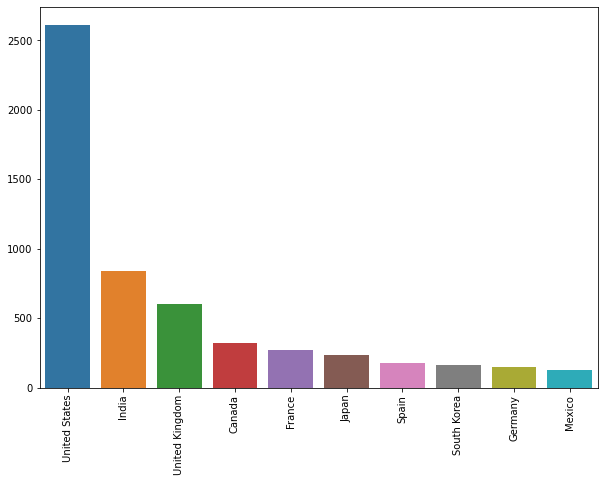

In [22]:
x = []
y = []
for i in top_10:
    x.append(i[0])
    y.append(i[1])

plt.figure(figsize =(10,7))
plt.xticks(rotation =90)
sns.barplot(x,y)
plt.show()

## 2018 ~ 2020년 국가별 제작편수
- 위의 국가별 제작편수는 2010년부터의 누적데이터이기 때문에 비교적 최근의 데이터만 확인하고싶어서 18~20년도 기간으로 한정해보았다.

In [39]:
## 2018 ~ 2020년 데이터
data_2018to20 = data[data['release_year'] >= 2018]
data_2018to20.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
27,80203094,Movie,City of Joy,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
28,80190843,TV Show,First and Last,NaN,NaN,NaN,"September 7, 2018",2018,TV-MA,1 Season,Docuseries,Take an intimate look at the emotionally charg...
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
31,80239639,Movie,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018,PG-13,106 min,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...


In [76]:
data_2018to20['country'].notnull()
# data_2018to20['country']
# list_18to20 = []
# dict_18to20 ={}
# for i in data_2018to20['country']:
#     if type(i) == str:
#         list_18to20 += i.split(',')

# for j in list_18to20:
#     dict_18to20[j.strip()] = dict_18to20.get(j.strip(),0 ) + 1

# # dict_18to20
# top_10_2018to20 =sorted(dict_18to20.items(), key = lambda x: x[1], reverse=True)[:10]
# top_10_2018to20


0        True
27       True
28      False
30       True
31       True
        ...  
6206     True
6215     True
6216     True
6219     True
6224     True
Name: country, Length: 1931, dtype: bool

- 결과적으로 18~20년으로 기간으로 한정해도 크게 차이는 없었고 다만 10위권 내에 독일대신 중국이 진입한 걸 확인할 수 있었다.

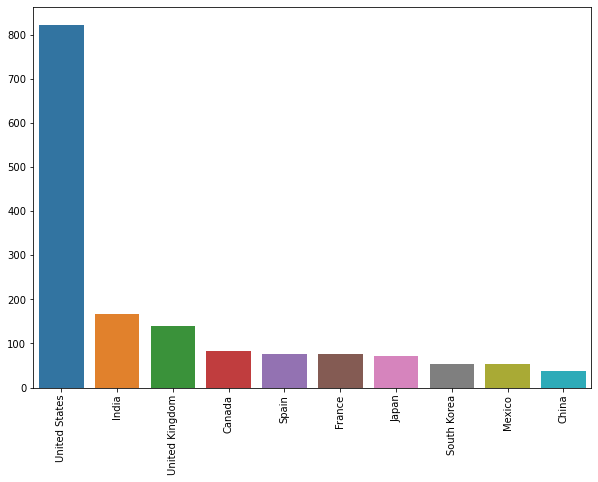

In [62]:
x = []
y = []
for i in top_10_2018to20:
    x.append(i[0])
    y.append(i[1])

plt.figure(figsize =(10,7))
plt.xticks(rotation =90)
sns.barplot(x,y)
plt.show()

# Feature 3. 넷플릭스 시리즈 다작배우 (cast)
- 2010년 이후로 넷플릭스에서 가장 다작을 하고있는 배우가 누구인지 50위까지 뽑아보았다.
- 의외로 내가 알고있는 배우가 거의 없었다...니콜라스케이지(23위), 사물엘잭슨(32위), 모건프리먼(39위) 정도..
- 이유를 확인해보니 1~5위까지가 모두 인도배우였고 그 뒤에 순위도 크게 다르지않을 것이라고 생각한다.
- 이 결과에서 유추해보면 인도가 미국보다 제작편수가 적은데 다작배우가 엄청 많다는 것은 인도에서는 배우의 수가 적어 한 배우가 여러 작품을 찍는다고 생각할 수 있고 아니면 반대로 미국에서는 작품에비해 배우가 너무 많아 출연빈도수가 낮다고 볼 수 있다.

In [31]:
data_cast = data[data['cast'].notnull()]
data_cast['cast']
cast_list = []
cast_dict ={}
for i in data_cast['cast']:
#     print(i)
    cast_list += i.split(',')

for j in cast_list:
    cast_dict[j.strip()] = cast_dict.get(j.strip(),0 ) + 1

cast_dict
top_10_cast =sorted(cast_dict.items(), key = lambda x: x[1], reverse=True)[:51]
for i in range(50):
    print(f'{i+1}위',top_10_cast[i][0], top_10_cast[i][1])

1위 Anupam Kher 33
2위 Shah Rukh Khan 30
3위 Naseeruddin Shah 27
4위 Om Puri 27
5위 Akshay Kumar 26
6위 Yuki Kaji 26
7위 Takahiro Sakurai 25
8위 Paresh Rawal 25
9위 Amitabh Bachchan 24
10위 Boman Irani 23
11위 Andrea Libman 22
12위 Ashleigh Ball 22
13위 John Cleese 22
14위 Kareena Kapoor 19
15위 Tara Strong 18
16위 Vincent Tong 18
17위 Gulshan Grover 18
18위 Erin Fitzgerald 18
19위 Fred Tatasciore 18
20위 Kay Kay Menon 18
21위 David Attenborough 18
22위 Daisuke Ono 18
23위 Nicolas Cage 17
24위 Laura Bailey 17
25위 Kate Higgins 17
26위 Robb Wells 16
27위 Jackie Shroff 16
28위 Mamoru Miyano 16
29위 Debi Derryberry 16
30위 John Paul Tremblay 15
31위 Danny Trejo 15
32위 Samuel L. Jackson 15
33위 Molly Shannon 15
34위 Rajpal Yadav 15
35위 Asrani 15
36위 Eric Idle 15
37위 Michael Palin 15
38위 Ajay Devgn 15
39위 Morgan Freeman 15
40위 Saif Ali Khan 15
41위 Tomokazu Sugita 15
42위 James Franco 14
43위 Kari Wahlgren 14
44위 Aamir Khan 14
45위 Adil Hussain 14
46위 Brian Drummond 14
47위 Alessandro Juliani 14
48위 Kathleen Barr 14
49위 Diana K

- 국가중에 인도를 제외하고 다작배우를 50위까지 확인해보았다.
- 하지만 내가 아는 배우는 여전히 많지 않은 듯 하다.

In [96]:
data_exindia = data[data['country'] != 'India']
data_cast = data_exindia[data_exindia['cast'].notnull()]
data_cast['cast']
cast_list = []
cast_dict ={}
for i in data_cast['cast']:
#     print(i)
    cast_list += i.split(',')

for j in cast_list:
    cast_dict[j.strip()] = cast_dict.get(j.strip(),0 ) + 1

cast_dict
top_10_cast =sorted(cast_dict.items(), key = lambda x: x[1], reverse=True)[:51]
for i in range(50):
    print(f'{i+1}위',top_10_cast[i][0], top_10_cast[i][1])

1위 Yuki Kaji 26
2위 Takahiro Sakurai 25
3위 Andrea Libman 22
4위 Ashleigh Ball 22
5위 John Cleese 22
6위 Tara Strong 18
7위 Vincent Tong 18
8위 Erin Fitzgerald 18
9위 Fred Tatasciore 18
10위 David Attenborough 18
11위 Daisuke Ono 18
12위 Nicolas Cage 17
13위 Laura Bailey 17
14위 Kate Higgins 17
15위 Robb Wells 16
16위 Mamoru Miyano 16
17위 Debi Derryberry 16
18위 John Paul Tremblay 15
19위 Danny Trejo 15
20위 Samuel L. Jackson 15
21위 Molly Shannon 15
22위 Eric Idle 15
23위 Michael Palin 15
24위 Morgan Freeman 15
25위 Tomokazu Sugita 15
26위 James Franco 14
27위 Kari Wahlgren 14
28위 Brian Drummond 14
29위 Alessandro Juliani 14
30위 Kathleen Barr 14
31위 Diana Kaarina 14
32위 Terry Jones 14
33위 Hiroshi Kamiya 14
34위 Tabitha St. Germain 14
35위 Samuel West 14
36위 Kana Hanazawa 14
37위 Antonio Banderas 13
38위 Ron Perlman 13
39위 Junichi Suwabe 13
40위 Ian James Corlett 13
41위 Seth Rogen 13
42위 Adam Sandler 13
43위 Yuichi Nakamura 13
44위 Saori Hayami 13
45위 Ai Kayano 13
46위 Graham Chapman 13
47위 Terry Gilliam 13
48위 Jun Fuk